In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [3]:
filepath = "./Dataset/"
totalvACT_df = pd.read_csv(filepath + "Total_vehicles_registered_in_the_ACT.csv")
totalvACT_df.head()

,Date,Vehicle body type,Motive power,Count
0,2015-07-01,AMBULANCE,Diesel,1
1,2015-07-01,AMBULANCE,Diesel,33
2,2015-07-01,ARMOURED VEHICLE,Diesel,1
3,2015-07-01,ARMOURED VEHICLE,Diesel,4
4,2015-07-01,ARMOURED VEHICLE,Diesel,8


In [3]:
totalvACT_clear = totalvACT_df.loc[(totalvACT_df["Vehicle body type"] == "SEDAN") &
                                    ((totalvACT_df["Motive power"] == "Diesel") |
                                    (totalvACT_df["Motive power"] == "Petrol") |
                                    (totalvACT_df["Motive power"] == "Electric"))]
totalvACT_clear["year"] = pd.DatetimeIndex(totalvACT_clear.loc[:,"Date"]).year
totalvACT_clear = totalvACT_clear[["year","Motive power","Count"]]
totalvACT_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 256 to 34830
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          2135 non-null   int64 
 1   Motive power  2135 non-null   object
 2   Count         2135 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 66.7+ KB


c:\Users\zhaoj\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Diesel,Petrol,Electric
2015,37224,922177,475
2016,76504,1834499,1355
2017,78942,1829863,1620
2018,79858,1827701,1802
2019,79097,1809127,2236


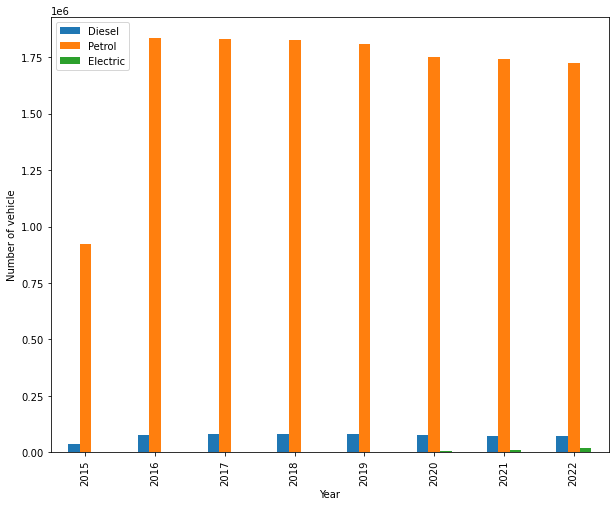

In [6]:
totalvACT_clear_grp = totalvACT_clear.groupby(["year","Motive power"])
totalvACT_clear_df = totalvACT_clear_grp["Count"].sum().reset_index(["Motive power"])
year = [2015,2016,2017,2018,2019,2020,2021,2022]
Diesel_ser = totalvACT_clear_df.loc[totalvACT_clear_df["Motive power"] == "Diesel"]["Count"]
Petrol_ser = totalvACT_clear_df.loc[totalvACT_clear_df["Motive power"] == "Petrol"]["Count"]
Electric_ser = totalvACT_clear_df.loc[totalvACT_clear_df["Motive power"] == "Electric"]["Count"]
barchart_df = pd.DataFrame({"Diesel":Diesel_ser,
                            "Petrol":Petrol_ser,
                            "Electric":Electric_ser},
                            index=year)
barchart = barchart_df.plot(kind="bar",figsize=(10,8))
barchart.set_xlabel("Year")
barchart.set_ylabel("Number of vehicle")
barchart_df.head()


In [8]:
def expfunc(x, a,b,c ):
    return a*np.exp(b *x) +c

def logfunc(x, a,b,c ):
    return a*np.log(b+x)+c

c:\Users\zhaoj\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\Users\zhaoj\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


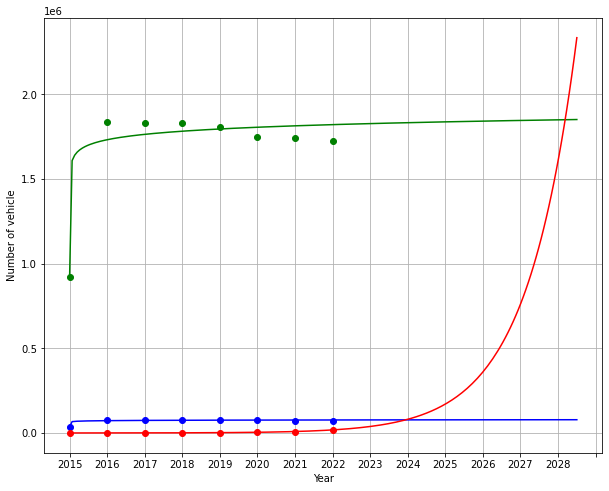

In [19]:
x = range(1,9)
x_fitted = np.linspace(np.min(x), np.max(x)+6.5, 200)
plt.figure(figsize=(10,8))

# Petrol
y1 = barchart_df["Petrol"]
popt1, pcov1 = curve_fit(logfunc, x, y1, maxfev=1000)
plt.plot(x, y1, 'go', label="Petrol")
y_fitted1 = logfunc(x_fitted, *popt1)
plt.plot(x_fitted, y_fitted1, 'g-', label="Petrol Fitted Curve")

# Diesel
y2 = barchart_df["Diesel"]
popt2, pcov2 = curve_fit(logfunc, x, y2, maxfev=1000)
plt.plot(x, y2, 'bo', label="Diesel")
y_fitted2 = logfunc(x_fitted, *popt2)
plt.plot(x_fitted, y_fitted2, 'b-', label="Fitted Curve")

# Electric
y3 = barchart_df["Electric"]
popt, pcov = curve_fit(expfunc, x, y3, maxfev=1000)
plt.plot(x, y3, 'ro', label="Electric")
y_fitted = expfunc(x_fitted, *popt)
plt.plot(x_fitted, y_fitted, 'r-', label="Fitted Curve")

plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of vehicle')

tick_locations = [value for value in range(1,16)]
plt.xticks(tick_locations,range(2015,2029))
plt.show()

### Global comparison

In [10]:
totalvGLB_df = pd.read_csv(filepath + "Global_EV_sales(2010-2020).csv")
totalvGLB_df.head()

,Year,EV sales,Car sales
0,2010,0.01,69.11
1,2011,0.04,72.21
2,2012,0.06,74.64
3,2013,0.11,77.78
4,2014,0.19,80.74


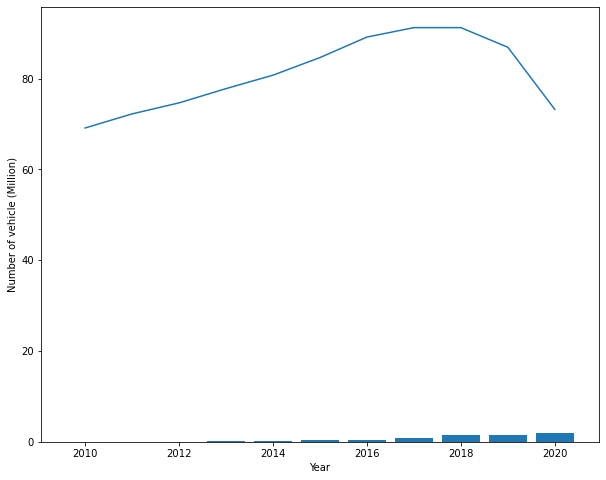

In [9]:
x_axis = totalvGLB_df["Year"]
plt.figure(figsize=(10,8))
plt.bar(x_axis, totalvGLB_df["EV sales"], align="center")
plt.plot(x_axis,totalvGLB_df["Car sales"])
plt.xlabel('Year')
plt.ylabel('Number of vehicle (Million)')
plt.show()
